In [1]:
import pickle
import torch
import os
import matplotlib.pyplot as plt


In [2]:
file_names = []

# Define the directory to search in
directory = os.getcwd()
pattern = 'Sim_'

# Iterate over the files in the directory
for filename in os.listdir(directory):
    # Check if the file name matches the pattern
    if filename.startswith(pattern):
        # Add the file name to the list
        file_names.append(filename)

data = []
# Load the files
for file_name in file_names:
    # Load the file
    with open(os.path.join(directory, file_name), 'rb') as file:
        # Do something with the file contents
        data.append(pickle.load(file))

print(file_names)

['Sim_15.pickle', 'Sim_20.pickle', 'Sim_25.pickle', 'Sim_30.pickle', 'Sim_35.pickle', 'Sim_40.pickle', 'Sim_45.pickle', 'Sim_50.pickle', 'Sim_55.pickle', 'Sim_60.pickle', 'Sim_65.pickle', 'Sim_70.pickle']


In [3]:
net_N = [res['res'][0] for res in data]

net_N

[420, 760, 1200, 1740, 2380, 3120, 3960, 4900, 5940, 7080, 8320, 9660]

In [4]:

x = [420, 760, 1200, 1740, 2380, 3120, 3960, 4900, 5940, 7080, 8320, 9660]
y = [0.3646, 0.3436, 0.3196, 0.3337, 0.3299, 0.3191, 0.3245, 0.3195, 0.3230,
        0.3248, 0.3199, 0.3210]


In [5]:
def compare(IM0, IM1):

    I0 = sum(IM0)
    I1 = sum(IM1)

    nI0 = IM0/I0
    nI1 = IM1/I1

    return sum(abs(nI0-nI1)), (I0, I1)

In [7]:
evaluation = torch.ones(len(data))
std = torch.ones(len(data))
I_EH = torch.ones(len(data))
I_RN = torch.ones(len(data))

for i, res in enumerate(data):
    evaluation[i], _ = compare(res['I2_EH'], res['I2_RN'])

print(evaluation)

tensor([0.3646, 0.3436, 0.3196, 0.3337, 0.3299, 0.3191, 0.3245, 0.3195, 0.3230,
        0.3248, 0.3199, 0.3210])


C:\Users\aleks\AppData\Local\Temp\ipykernel_13616\3145268581.py:12: RuntimeWarning: overflow encountered in exp
  return a + c * np.exp(-d * x)


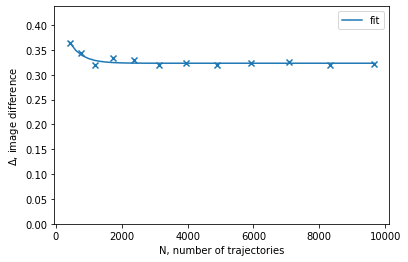

NameError: name 'p_cov' is not defined

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
x = np.array(net_N)
y = np.array(evaluation)

from scipy.optimize import curve_fit

# Define the functions to fit
def poly_exp_fit(x, a, c, d):
    return a + c * np.exp(-d * x)

# Initial guesses for the fit parameters
p0 = [0.3, 0.1, 0.01]

# Perform the fit
popt, pcov = curve_fit(poly_exp_fit, x, y, p0=p0)


# Create the scatter plot
fig, ax = plt.subplots(1,1, figsize=(6, 4))
plt.scatter(x, y, marker='x')

# Plot the fitted curves
x_fit = np.linspace(x.min(), x.max(), 50)
ax.plot(x_fit, poly_exp_fit(x_fit, *popt), label='fit')

# Add labels and title
ax.set_xlabel('N, number of trajectories')
ax.set_ylabel('$\Delta$, image difference')
ax.legend()
ax.set_ylim([0, evaluation.max()*1.2])

# Show the plot
plt.show()
print(p_cov)

In [10]:

residuals = y - poly_exp_fit(x, *popt)
var_residuals = np.var(residuals)
var_fitted = np.var(poly_exp_fit(x, *popt))
r2 = 1 - var_residuals / var_fitted

print(f"R-squared value: {r2:.3f}")

R-squared value: 0.844
